In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

plt.rc('font', family = 'AppleGothic')
filterwarnings('ignore')

In [20]:
df = pd.read_csv("dataset/sac_ver02.csv")
df_concert = df.query("`place` == '콘서트홀'")
df_paid = df_concert.query("`price`!= 0 & `discount_rate`!= -1 ")
df_paid.discount_rate.unique()

array([ 0, 20, 30, 40, 10, 50,  5, 25, 15, 60, 35, 12, 75, 80])

In [21]:
df_paid['price_org'] = round(((100 / (100 - df_paid['discount_rate'].astype(int))) * df_paid['price'].astype(int)).astype(int), -4)

In [22]:
# price_org 종류가 5개 이상인 값들을 확인
over6 = df_paid.groupby(['play'])[['price_org']].nunique()
over6.query('`price_org` > 5 ')
df_paid.query("`play` == '2021-11-26 20:00:00'")[['price','discount_rate','price_org']]
sorted(df_paid.query("`play` == '2021-11-26 20:00:00'")['price_org'].unique(),reverse=True)

[100000, 90000, 80000, 70000, 60000, 50000, 40000, 30000, 10000]

In [23]:
# 반올림을 적용하지 않은 값 확인
df_paid_org = df.query("`price`!= 0 & `discount_rate`!= -1 & `place` == '콘서트홀'" )
df_paid_org['price_org'] = ((100 / (100 - df_paid_org['discount_rate'].astype(int))) * df_paid_org['price'].astype(int)).astype(int)
df_paid_org.query("`play` == '2021-11-26 20:00:00'")['price_org'].unique()

array([ 40000, 100000,  70000,  10000,  69473,  61250,  28000,  87500,
        35000,  77777,  49000])

In [24]:
# 데이터들 하나씩 확인
df_paid_org.query("`play` == '2021-11-26 20:00:00' &  `price_org` == 35000")[['price','discount_rate','price_org','discount_name']]

,price,discount_rate,price_org,discount_name
494075,28000,20,35000,21년 4분기 시즌패키지 추가 구매(2매)


In [25]:
# 공연이 아니라 play 기준으로 확인하는 것!
print(len(df_paid.performance_code.unique()), "개의 공연이 있습니다.")
print(len(df_paid.play.unique()), "개의 play 데이터가 있습니다.")

652 개의 공연이 있습니다.
690 개의 play 데이터가 있습니다.


In [26]:
# play별로 grade 매기기 위해서 unique값 분리 후 리스트화
play_list = df_paid.play.unique().tolist()

# df_grade 초기화
df_grade = pd.DataFrame()
grade_dic = {i: grade for i, grade in enumerate(['R', 'S', 'A', 'B', 'C'])}

# df_play 하나씩 등급 매기기
for play in play_list : 
    
    # play 하나씩 순회
    df_play = df_paid[df_paid['play']==play]
    
    #price_org 높은 순부터 R,S,A,B,C 부여하기 위해서 sorted_list에는 5개만 담아두기
    sorted_list = sorted(df_play['price_org'].unique()[:5],reverse=True)

    #df_play['price_org']의 데이터를 sorted_list.index에서 찾았을 때 있으면 값 부여, 없으면 C 부여
    grades = df_play['price_org'].apply(lambda x: grade_dic[sorted_list.index(x)] if x in sorted_list else 'C')

    #grade col 생성
    df_play['grade'] = grades
    # df_grade에 하나씩 concat해서 업데이트
    df_grade = pd.concat([df_grade, df_play])

df_grade

,age,gender,price,ticket_cancel,performance_code,pre_open_date,open_date,genre,place,running_time,...,seat_floor,seat_block,seat_col,seat_num,discount_name,discount_rate,membership_free,membership_paid,price_org,grade
0,50,1,10000,2,302,1,2022-01-15,교향곡,콘서트홀,120,...,3,BOX9,-1,10,일반,0,일반,골드,10000,B
595,20,0,10000,2,302,1,2022-01-15,교향곡,콘서트홀,120,...,3,F,6,8,일반,0,싹틔우미,무료,10000,B
722,50,0,10000,0,302,1,2022-01-15,교향곡,콘서트홀,120,...,4,H,1,14,일반,0,일반,무료,10000,B
970,50,0,10000,0,302,1,2022-01-15,교향곡,콘서트홀,120,...,4,G,4,33,일반,0,일반,골드,10000,B
4273,50,1,10000,2,302,1,2022-01-15,교향곡,콘서트홀,120,...,3,M,2,2,일반,0,일반,골드,10000,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266539,60,1,40000,2,2903,0,2022-02-11,클래식,콘서트홀,90,...,1,C,1,1,블루회원 할인,20,일반,골드,50000,R
1374722,-1,-1,15000,0,2903,0,2022-02-11,클래식,콘서트홀,90,...,2,C,1,7,초/중/고/대학생 할인,50,비회원,비회원,30000,S
1535085,80,0,12000,0,2903,0,2022-02-11,클래식,콘서트홀,90,...,3,C,6,11,노블회원 할인,40,노블,무료,20000,A
1607647,20,0,15000,0,2903,0,2022-02-11,클래식,콘서트홀,90,...,1,A,6,8,초/중/고/대학생 할인,50,싹틔우미,무료,30000,S


In [27]:
df_grade.genre.unique()

array(['교향곡', '독주', '오페라', '합창', '클래식', '실내악', '성악', '콘서트', '기타', '복합장르',
       '재즈', '크로스오버', '가족극'], dtype=object)

In [28]:
df_grade.grade.value_counts()

grade
R    173485
A     99453
S     96760
B     92672
C     40843
Name: count, dtype: int64

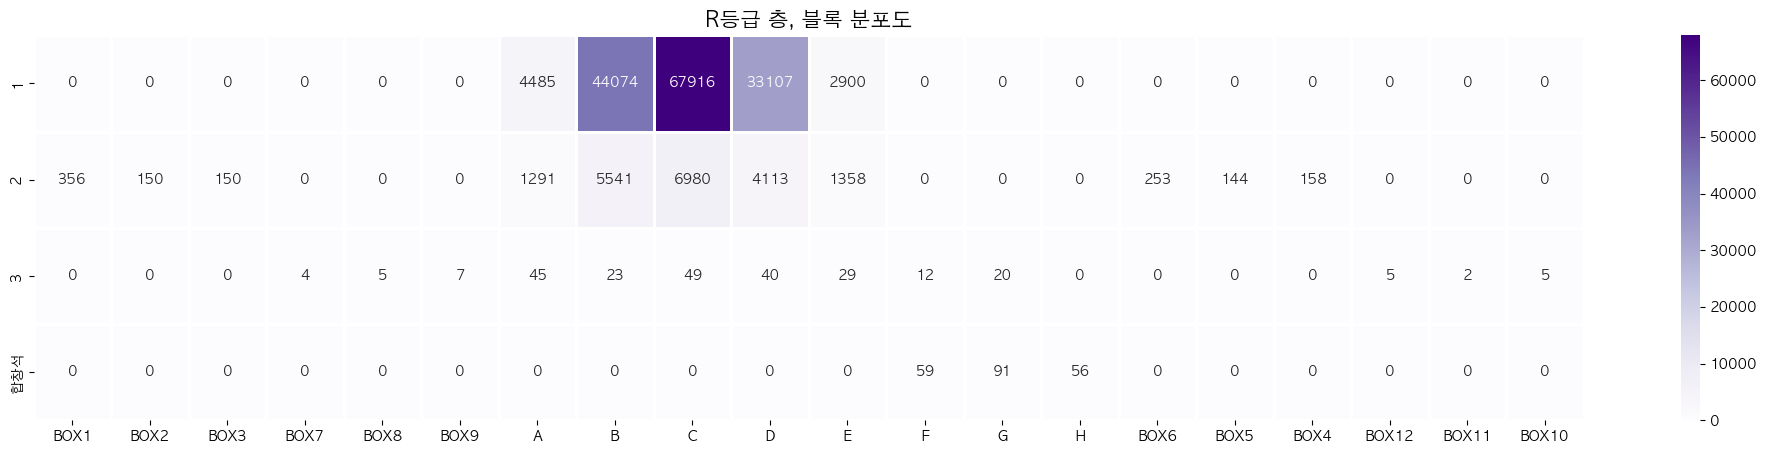

In [29]:
dfR_raw = df_grade.query("`grade`=='R'")
dfR = dfR_raw.copy()
dfR['seat_floor'] = dfR['seat_floor'].replace(4,"합창석")

# 데이터프레임을 피벗하여 빈도수 얻기
dfR_pivot = dfR.pivot_table(index='seat_floor', columns='seat_block', aggfunc='size', fill_value=0) #size : 조합

# 원하는 순서대로 값 정렬
dfR_pivot = dfR_pivot.loc[[1,2,3,'합창석']] #row
dfR_pivot = dfR_pivot[['BOX1','BOX2','BOX3','BOX7','BOX8','BOX9','A','B','C','D','E','F','G','H','BOX6','BOX5','BOX4','BOX12','BOX11','BOX10']] #col

# 히트맵 그리기
plt.figure(figsize=(25, 5))
sns.heatmap(dfR_pivot, annot=True, linewidths=1, linecolor='white', fmt='.0f', cmap='Purples')

plt.title('R등급 층, 블록 분포도', size=15, weight='bold') #제목
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

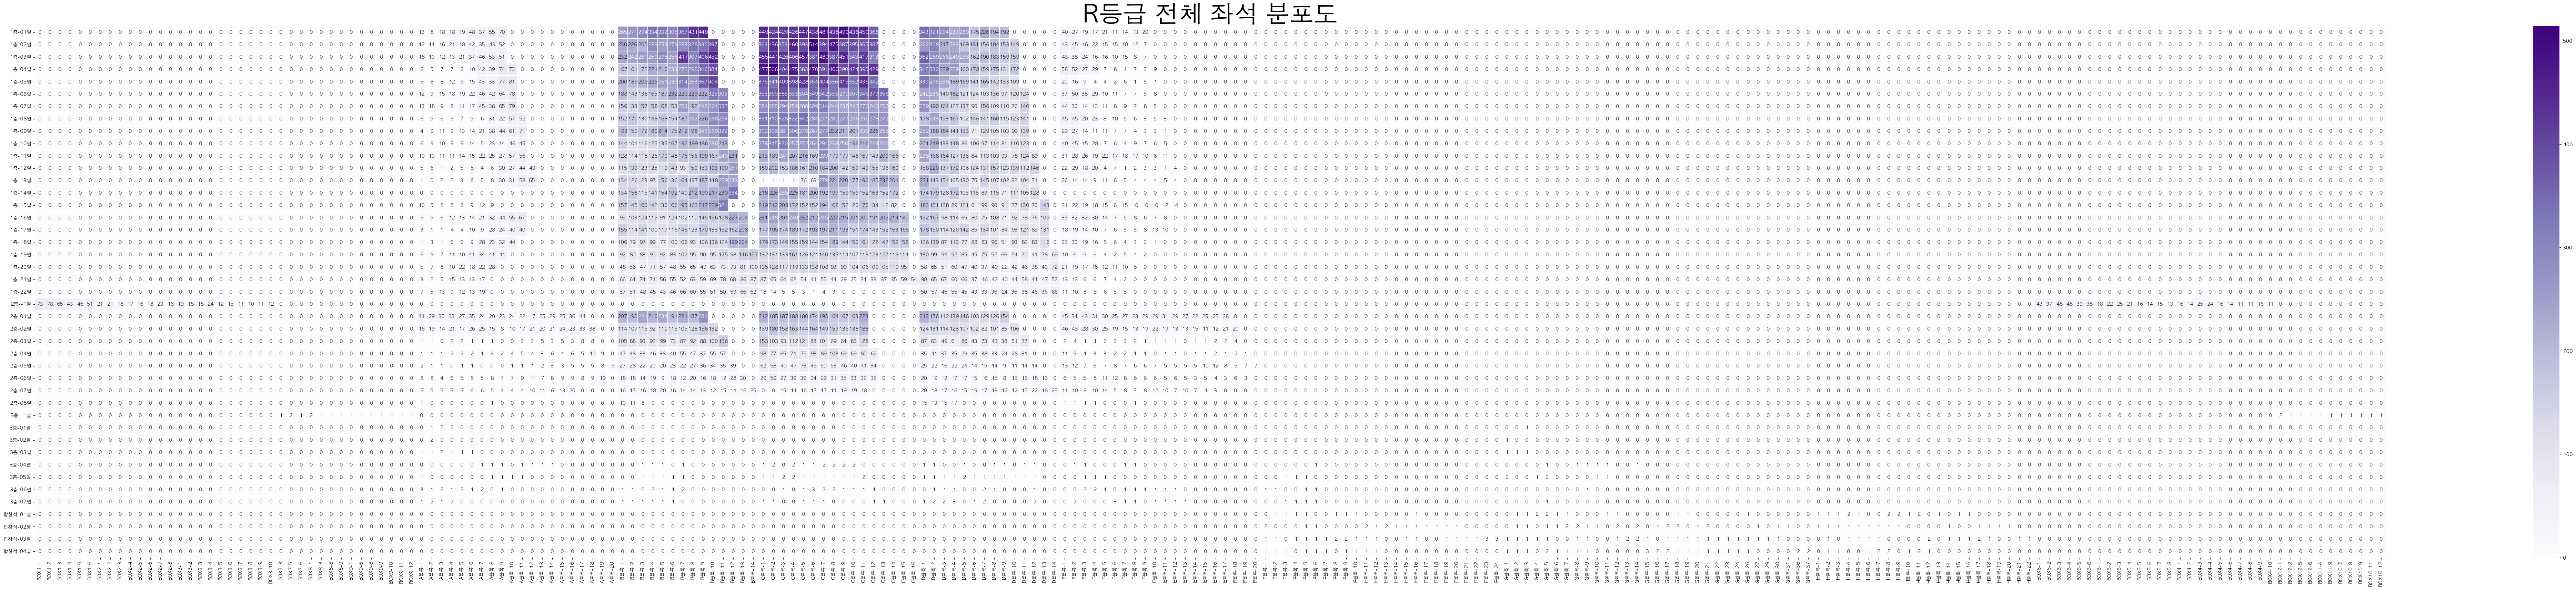

In [30]:
dfR_raw = df_grade.query("`grade`=='R'")
dfR_pivot1_raw = dfR_raw.pivot_table(index=['seat_floor','seat_col'], columns=['seat_block','seat_num'], aggfunc='size', fill_value=0) #pivot_table이 필요할 경우 사용
dfR = dfR_raw.copy()
# seat_floor "층" 추가, 4층은 합창석으로 대체
dfR['seat_floor'] = dfR['seat_floor'].astype(str) + "층"
dfR['seat_floor'] = dfR['seat_floor'].replace("4층","합창석")
# seat_block 열의 길이가 1인 경우 "블록" 문자열 추가
dfR['seat_block'] = dfR['seat_block'].astype(str)
dfR.loc[dfR['seat_block'].str.len() == 1, 'seat_block'] = dfR['seat_block'] + "블록"
dfR['seat_col'] = dfR['seat_col'].astype(str).str.zfill(2) + "열"
# 데이터프레임을 피벗하여 빈도수 얻기
dfR_pivot1 = dfR.pivot_table(index=['seat_floor','seat_col'], columns=['seat_block','seat_num'], aggfunc='size', fill_value=0) #size : 조합

# 원하는 순서대로 값 정렬
seat_floor_order = ['1층','2층','3층','합창석']
seat_block_order = ['BOX1','BOX2','BOX3','BOX7','BOX8','BOX9','A블록','B블록','C블록','D블록','E블록','F블록','G블록','H블록','BOX6','BOX5','BOX4','BOX12','BOX11','BOX10']
dfR_pivot1 = dfR_pivot1.loc[seat_floor_order, seat_block_order]

# 히트맵 그리기
plt.figure(figsize=(110, 20))
sns.heatmap(dfR_pivot1, annot=True, annot_kws={"size": 10}, linewidths=0.1, linecolor='white', fmt='.0f', cmap='Purples')

plt.title('R등급 전체 좌석 분포도', size=50, weight='bold') #제목
plt.xlabel('')
plt.ylabel('')
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

In [31]:
print("데이터 점검")
print("원래 df 길이 : ", len(df))
print("==========")
print("df_concert : 콘서트홀만 선택한 데이터 : ", len(df_concert))
print("df_paid : price 정보가 있는 데이터 : ", len(df_paid)) 
print("df_grade : grade 정보를 채운 데이터, df_paid와 같아야 함  : ",len(df_grade))
df_filled = df_concert[~df_concert.isin(df_paid)].dropna()
print("df_filled: grade 정보를 채워야 하는 데이터", len(df_filled))
print("df_grade + df_filled 데이터 길이가 df_concert와 같은지 확인 : ", len(df_grade) + len(df_filled))

데이터 점검
원래 df 길이 :  1920301
df_concert : 콘서트홀만 선택한 데이터 :  1096860
df_paid : price 정보가 있는 데이터 :  503213
df_grade : grade 정보를 채운 데이터, df_paid와 같아야 함  :  503213
df_filled: grade 정보를 채워야 하는 데이터 593647
df_grade + df_filled 데이터 길이가 df_concert와 같은지 확인 :  1096860


In [32]:
# step "각 등급별로", df_filled의 seat_floor, seat_block, seat_col, seat_num 정보를 확인해서 grade_count col 생성
dfR_raw = df_grade.query("`grade`=='R'")
dfR_raw['grade_count'] = dfR_raw.apply(lambda row: dfR_pivot1_raw.at[(row['seat_floor'], row['seat_col']), (row['seat_block'], row['seat_num'])], axis=1)

df_filled['grade_count'] = 0
df_filled['grade'] = np.nan
dfR_new = pd.concat([dfR_raw, df_filled]).sort_index()

dfR_new[['grade','grade_count']].isnull().sum()


grade          593647
grade_count         0
dtype: int64

In [50]:
dfR_new

,age,gender,price,ticket_cancel,performance_code,pre_open_date,open_date,genre,place,running_time,...,seat_block,seat_col,seat_num,discount_name,discount_rate,membership_free,membership_paid,price_org,grade,grade_count
4,50.0,0.0,180000.0,0.0,897.0,1.0,2022-01-10,독주,콘서트홀,90.0,...,B,12.0,7.0,일반,0.0,일반,무료,180000.0,R,93
6,-1.0,-1.0,0.0,0.0,44.0,0.0,2019-10-23,교향곡,콘서트홀,100.0,...,E,4.0,8.0,초대권,100.0,비회원,비회원,NaN,NaN,0
7,-1.0,-1.0,0.0,0.0,827.0,1.0,2019-06-02,교향곡,콘서트홀,120.0,...,D,8.0,4.0,초대권,100.0,비회원,비회원,NaN,NaN,0
15,30.0,1.0,130000.0,0.0,1684.0,1.0,2023-02-19,합창,콘서트홀,100.0,...,C,2.0,2.0,일반,0.0,일반,그린,130000.0,R,436
16,-1.0,-1.0,0.0,0.0,2778.0,1.0,2020-04-06,교향곡,콘서트홀,120.0,...,E,3.0,16.0,초대권,100.0,비회원,비회원,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920280,-1.0,-1.0,0.0,0.0,2747.0,1.0,2019-10-25,교향곡,콘서트홀,100.0,...,A,4.0,10.0,초대권,100.0,비회원,비회원,NaN,NaN,0
1920283,-1.0,-1.0,0.0,0.0,2132.0,1.0,2019-09-06,클래식,콘서트홀,100.0,...,E,7.0,15.0,초대권,100.0,비회원,비회원,NaN,NaN,0
1920285,-1.0,-1.0,0.0,0.0,2253.0,1.0,2019-05-19,클래식,콘서트홀,120.0,...,G,4.0,19.0,초대권,100.0,비회원,비회원,NaN,NaN,0
1920289,-1.0,-1.0,0.0,0.0,77.0,0.0,2020-09-20,클래식,콘서트홀,120.0,...,D,16.0,12.0,초대권,100.0,비회원,비회원,NaN,NaN,0


In [33]:
dfR_new_after = dfR_new.copy()
# 1. 'seat_floor', 'seat_block', 'seat_col', 'seat_num' 열을 기준으로 데이터를 묶고, 각 그룹 내에서 'grade_count' 열의 최대값을 찾음
max_grade_count = dfR_new_after.groupby(['seat_floor', 'seat_block', 'seat_col', 'seat_num'])['grade_count'].transform('max')

# 2. 각 그룹 내에서 'grade_count' 최대값을 가지는 'grade'가 "R"이라면? dfR_new['grade']에 R 부여
dfR_new_after['grade'] = dfR_new_after.apply(lambda row: 'R' if row['grade_count'] == max_grade_count[row.name] else row['grade'], axis=1)
dfR_new_after['grade_count'] = dfR_new_after.apply(lambda row: max_grade_count[row.name] if row['grade_count'] == max_grade_count[row.name] else row['grade_count'], axis=1)

print(dfR_new_after[['grade','grade_count']].isnull().sum())

grade          548723
grade_count         0
dtype: int64


In [34]:
grades_before = dfR_new[dfR_new['grade'] != dfR_new_after['grade']]
grades_before.query('`grade` == `grade`')

,age,gender,price,ticket_cancel,performance_code,pre_open_date,open_date,genre,place,running_time,...,seat_block,seat_col,seat_num,discount_name,discount_rate,membership_free,membership_paid,price_org,grade,grade_count


In [35]:
grades_after = dfR_new_after[dfR_new_after['grade'] != dfR_new['grade']]
grades_after.query('`grade` == `grade`')

,age,gender,price,ticket_cancel,performance_code,pre_open_date,open_date,genre,place,running_time,...,seat_block,seat_col,seat_num,discount_name,discount_rate,membership_free,membership_paid,price_org,grade,grade_count
26,-1.0,-1.0,0.0,0.0,2215.0,1.0,2019-07-10,클래식,콘서트홀,110.0,...,G,5.0,8.0,초대권,100.0,비회원,비회원,NaN,R,0
59,-1.0,-1.0,0.0,0.0,1209.0,1.0,2019-10-14,클래식,콘서트홀,120.0,...,F,4.0,3.0,초대권,100.0,비회원,비회원,NaN,R,0
68,-1.0,-1.0,0.0,0.0,2840.0,0.0,2021-10-18,교향곡,콘서트홀,100.0,...,D,7.0,13.0,초대권,100.0,비회원,비회원,NaN,R,0
180,-1.0,-1.0,0.0,0.0,2230.0,0.0,2022-12-12,교향곡,콘서트홀,120.0,...,G,6.0,4.0,초대권,100.0,비회원,비회원,NaN,R,0
220,-1.0,-1.0,0.0,0.0,1382.0,0.0,2022-01-10,성악,콘서트홀,100.0,...,C,7.0,12.0,공연진행석,100.0,비회원,비회원,NaN,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919882,-1.0,-1.0,0.0,0.0,2749.0,1.0,2022-08-19,교향곡,콘서트홀,120.0,...,A,2.0,5.0,초대권,100.0,비회원,비회원,NaN,R,0
1919948,-1.0,-1.0,0.0,0.0,2744.0,0.0,2023-02-03,교향곡,콘서트홀,110.0,...,A,15.0,10.0,공연진행석,100.0,비회원,비회원,NaN,R,0
1920114,-1.0,-1.0,0.0,0.0,2775.0,0.0,2023-04-08,교향곡,콘서트홀,80.0,...,H,3.0,19.0,초대권,100.0,비회원,비회원,NaN,R,0
1920230,-1.0,-1.0,0.0,0.0,2134.0,0.0,2020-01-05,교향곡,콘서트홀,150.0,...,D,7.0,9.0,기획사판매,100.0,비회원,비회원,NaN,R,0


In [118]:
# # BETWEEN... 속도가 너무 느림!
# dfR_new_after_between = pd.DataFrame() # 빈 리스트 생성

# #floor별로 하나씩
# floor_list = dfR_new_after.seat_floor.unique().tolist()
# for floor in floor_list:
#     df_floor = dfR_new_after.query(f"`seat_floor`=={floor}")
#     #block 별로 하나씩
#     block_list = df_floor.seat_block.unique().tolist()
#     for block in block_list:
#         df_block = df_floor.query(f"`seat_block`=='{block}'")
#         # 변수 찾을 df_minmax 정의(임시용, 따로 저장X)
#         df_minmax = df_block[(df_block['grade']=="R") & (df_block['grade_count'] > df_block['grade_count'].mean())] # grade_count가 평균값 이상일 때만.
        
#         max_col = df_minmax['seat_col'].max()
#         min_col = df_minmax['seat_col'].min()
#         max_num = df_minmax['seat_num'].max()
#         min_num = df_minmax['seat_num'].min()

#         print(max_col, min_col, max_num, min_num)
#         # df_block 하나씩 돌면서
#         for row in df_block.index :
#             if df_block.loc[row, 'grade'] != df_block.loc[row, 'grade'] :
#                 if (min_col < df_block.loc[row,'seat_col'] < max_col) and (min_num < df_block.loc[row,'seat_num'] < max_num) :
#                     df_block['grade'] = "R"

#                     # 하나씩 병합
#                     dfR_new_after_between = pd.concat([dfR_new_after_between,df_block])
#                 else :
#                     dfR_new_after_between = pd.concat([dfR_new_after_between,df_block])
                
                
# dfR_new_after_between

In [111]:
# # BETWEEN 속도 향상
# dfR_new_after_between = pd.DataFrame() # 빈 리스트 생성

# #floor별로 하나씩
# floor_list = dfR_new_after.seat_floor.unique().tolist()
# for floor in floor_list:
#     df_floor = dfR_new_after.query(f"`seat_floor`=={floor}")
#     #block 별로 하나씩
#     block_list = df_floor.seat_block.unique().tolist()
#     for block in block_list:
#         df_block = df_floor.query(f"`seat_block`=='{block}'")
#         # 변수 찾을 df_minmax 정의(임시용, 따로 저장X)
#         df_minmax = df_block[(df_block['grade']=="R") & (df_block['grade_count'] > df_block['grade_count'].mean())] # grade_count가 평균값 이상일 때만.
        
#         max_col = df_minmax['seat_col'].max()
#         min_col = df_minmax['seat_col'].min()
#         max_num = df_minmax['seat_num'].max()
#         min_num = df_minmax['seat_num'].min()

#         # df_block notnull, null(->between, outer) 각각 처리
#         df_block_notnull = df_block.query("`grade` == `grade`")

#         df_block_null = df_block.query("`grade` != `grade`")
#         # null값인데 사이에 있는 경우, 해당 등급으로 채우기
#         df_block_between = df_block_null[(min_col < df_block_null.loc[:,'seat_col']) & (df_block_null.loc[:,'seat_col'] < max_col) & (min_num < df_block_null.loc[:,'seat_num']) & (df_block_null.loc[:,'seat_num'] < max_num)]
#         df_block_between['grade'] = "R"
#         # null값인데 그 밖에 있는 경우, 그대로
#         df_block_outer = df_block_null.loc[~df_block_null.index.isin(df_block_between.index)]
#         dfR_new_after_between = pd.concat([dfR_new_after_between,df_block_notnull,df_block_between,df_block_outer])
                
# dfR_new_after_between

,age,gender,price,ticket_cancel,performance_code,pre_open_date,open_date,genre,place,running_time,...,seat_block,seat_col,seat_num,discount_name,discount_rate,membership_free,membership_paid,price_org,grade,grade_count
4,50.0,0.0,180000.0,0.0,897.0,1.0,2022-01-10,독주,콘서트홀,90.0,...,B,12.0,7.0,일반,0.0,일반,무료,180000.0,R,93
27,20.0,1.0,66000.0,0.0,221.0,1.0,2023-02-26,클래식,콘서트홀,150.0,...,B,21.0,9.0,싹틔우미 할인,40.0,싹틔우미,무료,110000.0,R,59
28,50.0,1.0,88000.0,0.0,221.0,1.0,2023-02-26,클래식,콘서트홀,150.0,...,B,17.0,4.0,라흐마니노프탄생150주년(8매/3.27까지),20.0,일반,블루,110000.0,R,100
38,40.0,1.0,45000.0,0.0,317.0,0.0,2020-07-04,교향곡,콘서트홀,120.0,...,B,3.0,7.0,장애인/국가유공자 할인,50.0,일반,골드,90000.0,R,417
76,50.0,1.0,120000.0,2.0,1169.0,1.0,2021-09-05,클래식,콘서트홀,120.0,...,B,14.0,11.0,그린회원 할인,20.0,일반,블루,150000.0,R,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916644,-1.0,-1.0,5000.0,0.0,2756.0,1.0,2022-08-06,교향곡,콘서트홀,101.0,...,G,1.0,12.0,차액,-1.0,비회원,비회원,NaN,NaN,0
1918323,-1.0,-1.0,0.0,0.0,2215.0,1.0,2019-07-10,기타,콘서트홀,110.0,...,G,4.0,18.0,초대권,100.0,비회원,비회원,NaN,NaN,0
1919322,-1.0,-1.0,8000.0,0.0,545.0,1.0,2022-07-02,합창,콘서트홀,90.0,...,G,1.0,19.0,차액,-1.0,비회원,비회원,NaN,NaN,0
1919966,-1.0,-1.0,0.0,0.0,960.0,1.0,2022-11-14,콘서트,콘서트홀,110.0,...,G,3.0,1.0,기획사판매,100.0,비회원,비회원,NaN,NaN,0


In [114]:
# BETWEEN + tran_rank
dfR_new_after_between = pd.DataFrame() # 빈 리스트 생성

#floor별로 하나씩
floor_list = dfR_new_after.seat_floor.unique().tolist()
for floor in floor_list:
    df_floor = dfR_new_after.query(f"`seat_floor`=={floor}")
    #block 별로 하나씩
    block_list = df_floor.seat_block.unique().tolist()
    for block in block_list:
        df_block = df_floor.query(f"`seat_block`=='{block}'")
        # 변수 찾을 df_minmax 정의(임시용, 따로 저장X)
        df_minmax = df_block[(df_block['grade']=="R") & (df_block['grade_count'] > df_block['grade_count'].mean())] # grade_count가 평균값 이상일 때만.
        
        max_col = df_minmax['seat_col'].max()
        min_col = df_minmax['seat_col'].min()
        max_num = df_minmax['seat_num'].max()
        min_num = df_minmax['seat_num'].min()

        # df_block between, outer  처리
        # 사이에 있는 경우, 해당 등급으로 채우기
        df_block_between = df_block[(min_col < df_block.loc[:,'seat_col']) & (df_block.loc[:,'seat_col'] < max_col) & (min_num < df_block.loc[:,'seat_num']) & (df_block.loc[:,'seat_num'] < max_num)]
        df_block_between['grade'] = "R"
        # 바깥에 있는 경우, tran_rank_good & trank_rank_bad로 나누기
        df_block_outer = df_block.loc[~df_block.index.isin(df_block_between.index)]
        df_tran_good = df_block_outer[df_block_outer['tran_rank'] > df_block_outer['tran_rank'].mean()]
        df_tran_good['grade'] = "R"
        df_tran_bad = df_block_outer[df_block_outer['tran_rank'] <= df_block_outer['tran_rank'].mean()]
        df_tran_bad['grade'] = "S"
        dfR_new_after_between = pd.concat([dfR_new_after_between,df_block_between,df_tran_good, df_tran_bad])
                
dfR_new_after_between

,age,gender,price,ticket_cancel,performance_code,pre_open_date,open_date,genre,place,running_time,...,seat_block,seat_col,seat_num,discount_name,discount_rate,membership_free,membership_paid,price_org,grade,grade_count
4,50.0,0.0,180000.0,0.0,897.0,1.0,2022-01-10,독주,콘서트홀,90.0,...,B,12.0,7.0,일반,0.0,일반,무료,180000.0,R,93
25,-1.0,-1.0,0.0,0.0,1496.0,1.0,2019-03-03,교향곡,콘서트홀,90.0,...,B,7.0,7.0,초대권,100.0,비회원,비회원,NaN,R,0
28,50.0,1.0,88000.0,0.0,221.0,1.0,2023-02-26,클래식,콘서트홀,150.0,...,B,17.0,4.0,라흐마니노프탄생150주년(8매/3.27까지),20.0,일반,블루,110000.0,R,100
38,40.0,1.0,45000.0,0.0,317.0,0.0,2020-07-04,교향곡,콘서트홀,120.0,...,B,3.0,7.0,장애인/국가유공자 할인,50.0,일반,골드,90000.0,R,417
54,-1.0,-1.0,0.0,2.0,876.0,0.0,2023-01-08,클래식,콘서트홀,120.0,...,B,7.0,5.0,초대권,100.0,비회원,비회원,NaN,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916278,-1.0,-1.0,0.0,0.0,2464.0,0.0,2023-05-01,합창,콘서트홀,110.0,...,G,1.0,8.0,초대권,100.0,비회원,비회원,NaN,S,0
1917794,-1.0,-1.0,0.0,2.0,1534.0,1.0,2022-12-25,교향곡,콘서트홀,110.0,...,G,1.0,9.0,초대권,100.0,비회원,비회원,NaN,S,0
1918323,-1.0,-1.0,0.0,0.0,2215.0,1.0,2019-07-10,기타,콘서트홀,110.0,...,G,4.0,18.0,초대권,100.0,비회원,비회원,NaN,S,0
1919966,-1.0,-1.0,0.0,0.0,960.0,1.0,2022-11-14,콘서트,콘서트홀,110.0,...,G,3.0,1.0,기획사판매,100.0,비회원,비회원,NaN,S,0


In [115]:
print(len(dfR_new_after))
print(len(dfR_new_after_between))

767132
767132


In [116]:
dfR_new_after_between.isnull().sum()

age                      0
gender                   0
price                    0
ticket_cancel            0
performance_code         0
pre_open_date            0
open_date                0
genre                    0
place                    0
running_time             0
intermission             0
member_yn                0
tran                     0
tran_day                 0
play                     0
play_day                 0
tran_rank                0
seat_floor               0
seat_block               0
seat_col                 0
seat_num                 0
discount_name            0
discount_rate            0
membership_free          0
membership_paid          0
price_org           593647
grade                    0
grade_count              0
dtype: int64

In [117]:
dfR_new_after_between['grade'].value_counts()

grade
R    621086
S    146046
Name: count, dtype: int64

In [ ]:
# 장르, 등급별 컬러 적용한 함수 만들기
# 1. 층, 블록 분포도 시각화
# 2. 전체 좌석 분포도 시각화
# 3. 해당 좌석정보들을 기준으로 빈 값들을 빈도순 and between 으로 채우고 => 그래도 남은 값들은 tran_rank 사용해서 채우는 함수
# input : df, 몇등급, col이름(장르). output : 시각화 그래프 2개, grade가 빠짐없이 채워진 df

In [ ]:
def grade_byprice(df, place = '콘서트홀') :
    df_concert = df.query(f"`place` == {place}").sort_values(by='play')

    # 1. 가격, 할인율 정보가 있는 df만 선택해 작업
    df_paid = df_concert.query("`price`!= 0 & `discount_rate`!= -1 ")

    # 2. df_paid['price_org'] 생성(천의 자리에서 반올림)
    df_paid['price_org'] = round(((100 / (100 - df_paid['discount_rate'].astype(int))) * df_paid['price'].astype(int)).astype(int), -4)
    
    # 3. df_paid에 좌석등급을 채운 df_grade 생성 : play별로 grade 매기기 위해서 unique값 분리 후 리스트화
    play_list = df_paid.play.unique().tolist()

    # 4. df_grade 초기화 및 딕셔너리 설정
    df_grade = pd.DataFrame()
    grade_dic = {i: grade for i, grade in enumerate(['R', 'S', 'A', 'B', 'C'])}

    # 5. df_play 하나씩 등급 매기기
    for play in play_list : 
        
        # play 하나씩 순회
        df_play = df_paid[df_paid['play']==play]
        
        #price_org 높은 순부터 R,S,A,B,C 부여하기 위해서 sorted_list에는 5개만 담아두기
        sorted_list = sorted(df_play['price_org'].unique()[:5],reverse=True)

        #df_play['price_org']의 데이터를 sorted_list.index에서 찾았을 때 있으면 값 부여, 없으면 C 부여
        grades = df_play['price_org'].apply(lambda x: grade_dic[sorted_list.index(x)] if x in sorted_list else 'C')

        #grade col 생성
        df_play['grade'] = grades

        # df_grade에 하나씩 concat해서 업데이트
        df_grade = pd.concat([df_grade, df_play])
    return df_grade.sort_index()

In [ ]:
def grade_heatmap(df, place = '콘서트홀', seat_grade = 'R', floorblock=True, all=True)    
    
    # 1. place, seat_grade 인자에 따라 달라지게 설정
    df_place = df.query(f"`place` == {place}").sort_values(by='play')
    df_grade = df_place.query(f"`grade`=={seat_grade}")
    
    # 2. 층, 블록만 시각화(옵션)
    if floorblock == True : 
        # 2-1. 원본 데이터 pivot table 교차빈도값 획득 후 저장(->return)
        df_pivot_fb_raw = df_grade.pivot_table(index='seat_floor', columns='seat_block', aggfunc='size', fill_value=0) #size : 조합
        
        # 2-2. 시각화를 위한 처리 진행
        dfG = df_grade.copy()
        # seat_floor "층" 추가, 4층은 합창석으로 대체
        dfG['seat_floor'] = dfG['seat_floor'].astype(str) + "층"
        dfG['seat_floor'] = dfG['seat_floor'].replace("4층","합창석")
        # seat_block 길이가 1인 경우 "블록" 추가, seat_col "열" 추가
        dfG['seat_block'] = dfG['seat_block'].astype(str)
        dfG.loc[dfG['seat_block'].str.len() == 1, 'seat_block'] = dfG['seat_block'] + "블록"
        dfG['seat_col'] = dfG['seat_col'].astype(str).str.zfill(2) + "열"

        # 2-3. 편집된 dfG로 pivot_table화 및 값 정렬
        df_pivot_fb = dfG.pivot_table(index='seat_floor', columns='seat_block', aggfunc='size', fill_value=0) #size : 조합
        df_pivot_fb = df_pivot_fb.loc[['1층','2층','3층','합창석']] #row
        df_pivot_fb = df_pivot_fb[['BOX1','BOX2','BOX3','BOX7','BOX8','BOX9','A블록','B블록','C블록','D블록','E블록','F블록','G블록','H블록','BOX6','BOX5','BOX4','BOX12','BOX11','BOX10']] #col

        # 2-4. heatmap 그리기
        plt.figure(figsize=(25, 5))
        sns.heatmap(df_pivot_fb, annot=True, linewidths=1, linecolor='white', fmt='.0f', cmap='Purples')

        plt.title(f"{seat_grade}등급 층, 블록 분포도", size=15, weight='bold') #제목
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(size=10)
        plt.yticks(size=10)
        plt.show()

        # 2-5. 그림으로 저장
        heatmap_fb = plt.gcf()

    # 3. 전체 시각화(옵션)
    if all == True :
        # 3-1. 원본 데이터 pivot table 교차빈도값 획득 후 저장(->return)
        df_pivot_all_raw = df_grade.pivot_table(index=['seat_floor','seat_col'], columns=['seat_block','seat_num'], aggfunc='size', fill_value=0) 
        
        # 3-2. 시각화를 위한 처리 진행
        dfG = df_grade.copy()
        # seat_floor "층" 추가, 4층은 합창석으로 대체
        dfG['seat_floor'] = dfG['seat_floor'].astype(str) + "층"
        dfG['seat_floor'] = dfG['seat_floor'].replace("4층","합창석")
        # seat_block 길이가 1인 경우 "블록" 추가, seat_col "열" 추가
        dfG['seat_block'] = dfG['seat_block'].astype(str)
        dfG.loc[dfR['seat_block'].str.len() == 1, 'seat_block'] = dfG['seat_block'] + "블록"
        dfG['seat_col'] = dfG['seat_col'].astype(str).str.zfill(2) + "열"

        # 3-3. 편집된 dfG로 pivot_table화 및 값 정렬
        df_pivot_all = dfG.pivot_table(index=['seat_floor','seat_col'], columns=['seat_block','seat_num'], aggfunc='size', fill_value=0) #size : 조합
        seat_floor_order = ['1층','2층','3층','합창석']
        seat_block_order = ['BOX1','BOX2','BOX3','BOX7','BOX8','BOX9','A블록','B블록','C블록','D블록','E블록','F블록','G블록','H블록','BOX6','BOX5','BOX4','BOX12','BOX11','BOX10']
        df_pivot_all = df_pivot_all.loc[seat_floor_order, seat_block_order]

        # 3-4. 히트맵 그리기
        plt.figure(figsize=(110, 20))
        sns.heatmap(df_pivot_all, annot=True, annot_kws={"size": 10}, linewidths=0.1, linecolor='white', fmt='.0f', cmap='Purples')

        plt.title(f"{seat_grade}등급 전체 좌석 분포도", size=50, weight='bold') #제목
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(size=10)
        plt.yticks(size=10)
        plt.show()

        # 2-5. 그림으로 저장
        heatmap_all = plt.gcf()

        return df_pivot_fb_raw, df_pivot_all_raw, heatmap_fb, heatmap_all # 변수에 담고, 그림 출력 시 heatmap_all.show()

In [119]:
def grade_byseat(df, df_grade, df_pivot_all_raw, place = '콘서트홀', seat_grade = 'R') : # df=원본 전체, df_grade=grade가 매겨진 데이터프레임, df_pivot_all_raw =위의 함수에서 얻은 전체 데이터 피벗값
    df_concert = df.query(f"`place` == {place}").sort_values(by='play')
    df_notconcert = df[~df.isin(df_concert)].dropna()

    # 1. df_grade를 기준으로 df_filled의 grade를 매길 예정
    df_filled = df_concert[~df_concert.isin(df_grade)].dropna()

    # 2. "지정한 등급에서", df_filled의 seat_floor, seat_block, seat_col, seat_num 정보를 확인해서 grade_count col 생성
    dfG_raw = df_grade.query(f"`grade`=={seat_grade}")
    dfG_raw['grade_count'] = dfG_raw.apply(lambda row: df_pivot_all_raw.at[(row['seat_floor'], row['seat_col']), (row['seat_block'], row['seat_num'])], axis=1)

    # 3. 초기값 설정 : grade_count = 0, grade = nan
    df_filled['grade_count'] = 0
    df_filled['grade'] = np.nan

    dfG = pd.concat([dfG_raw, df_filled]).sort_index()
    dfG_fill = dfG.copy()

    # 4. 'seat_floor', 'seat_block', 'seat_col', 'seat_num' 열을 기준으로 데이터를 묶고, 각 그룹 내에서 'grade_count' 열의 최대값을 찾음
    max_grade_count = dfG_fill.groupby(['seat_floor', 'seat_block', 'seat_col', 'seat_num'])['grade_count'].transform('max')

    # 5. 각 그룹 내에서 'grade_count' 최대값을 가지는 'grade'가 "R"이라면? dfG_fill['grade']에 "R" 부여
    dfG_fill['grade'] = dfG_fill.apply(lambda row: seat_grade if row['grade_count'] == max_grade_count[row.name] else row['grade'], axis=1)
    dfG_fill['grade_count'] = dfG_fill.apply(lambda row: max_grade_count[row.name] if row['grade_count'] == max_grade_count[row.name] else row['grade_count'], axis=1)

    # 6. 특정 등급 빈도가 평균 이상인 좌석 기준, BETWEEN에 위치한 값을 해당 등급으로 채우기
    # + Outer에 위치한 값은 tran_rank 가 평균 이상이면 해당 등급, 평균 이하면 하나 낮은 등급, C면 C를 부여하기.
    dfG_fill_byseat = pd.DataFrame() # 빈 리스트 생성

    # 6-1. floor별로 하나씩
    floor_list = dfG_fill.seat_floor.unique().tolist()
    for floor in floor_list:
        df_floor = dfG_fill.query(f"`seat_floor`=={floor}")
        # 6-2. block 별로 하나씩
        block_list = df_floor.seat_block.unique().tolist()
        for block in block_list:
            df_block = df_floor.query(f"`seat_block`=='{block}'")
            # 6-3. 변수 찾을 df_minmax 정의(임시용, 따로 저장X)
            df_minmax = df_block[(df_block['grade']==seat_grade) & (df_block['grade_count'] > df_block['grade_count'].mean())] # grade_count가 평균값 이상일 때만.
            
            max_col = df_minmax['seat_col'].max()
            min_col = df_minmax['seat_col'].min()
            max_num = df_minmax['seat_num'].max()
            min_num = df_minmax['seat_num'].min()

            # 6-4. df_block between, outer  처리
            # 6-4-1. 사이에 있는 경우, 해당 등급으로 채우기
            df_block_between = df_block[(min_col < df_block.loc[:,'seat_col']) & (df_block.loc[:,'seat_col'] < max_col) & (min_num < df_block.loc[:,'seat_num']) & (df_block.loc[:,'seat_num'] < max_num)]
            df_block_between['grade'] = seat_grade
            # 6-4-2. 바깥에 있는 경우
            df_block_outer = df_block.loc[~df_block.index.isin(df_block_between.index)]
            # 6-4-3. tran_rank_good : 평균보다 빨리 예매된 경우 해당 등급을 부여
            df_tran_good = df_block_outer[df_block_outer['tran_rank'] > df_block_outer['tran_rank'].mean()]
            df_tran_good['grade'] = seat_grade

            # 6-4-4. tran_rank_bad : 평균보다 늦게 예매된 경우 한 단계 아래 등급을 부여
            df_tran_bad = df_block_outer[df_block_outer['tran_rank'] <= df_block_outer['tran_rank'].mean()]
            
            grade_dic = {i: grade for i, grade in enumerate(['R', 'S', 'A', 'B', 'C'])}

            if int(list(grade_dic.values()).index(seat_grade)) < 4 :
                df_tran_bad['grade'] = grade_dic[int(list(grade_dic.values()).index(seat_grade)) + 1]
            # C는 아래 등급이 없으므로 자기 자신 부여
            elif int(list(grade_dic.values()).index(seat_grade)) == 4 :
                df_tran_bad['grade'] = seat_grade

            # 7. 데이터프레임에 채우기    
            dfG_fill_byseat = pd.concat([dfG_fill_byseat, df_block_between, df_tran_good, df_tran_bad])
    dfG_fill_byseat_allplace = pd.concat([dfG_fill_byseat,df_notconcert])
    return dfG_fill_byseat, dfG_fill_byseat_allplace #선택한 홀의 df만, 안 채운 다른 홀의 df까지

In [151]:
# #TEST
# grade_dic = {i: grade for i, grade in enumerate(['R', 'S', 'A', 'B', 'C'])}
# seat_grade = 'C'

# if int(list(grade_dic.values()).index(seat_grade)) < 4 :
#     t = seat_grade
#     t_next = grade_dic[int(list(grade_dic.values()).index(seat_grade)) + 1]

# elif int(list(grade_dic.values()).index(seat_grade)) == 4 :
#     t = seat_grade
#     t_next = seat_grade
    
# print(t)
# print(t_next)
# # list(grade_dic.keys())[]
# # int(list(grade_dic.values()).index(seat_grade))

C
C
